# Using numerical methods to simulate "weather"

---

## What you'll get out of this assignment
Yeah, I know there's math below, and you might feel disgusted by that. But (please) don't! Instead, boldly read on.

I promise the math isn't that bad, and you won't have to do it yourself, anyway; that's what Python is for!

I think you will, however, get a lot from this assignment. Specifically, you'll
* get acquainted with [`scipy`](https://www.scipy.org/), Python's primary module for scientific computing,;
* generate some cool animations;
* get some exposure to chaos theory;
* learn how to simulate a dynamical system, something useful in many fields (the example here is from fluid mechanics/heat transfer, but dynamical systems are everywhere - robotics, economics, epidemiology, even the climate); who knows, the code you write here might even come in handy on assignments for your other Mech Eng classes!

---

## Background
### The Lorenz equations
The [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system) describe what happens to a layer of fluid that is warmed from below and cooled from above. Consequently, they are useful as a _simplified_ model for weather systems, consisting of 
* one independent variable (time),
* only three dependent variables, and
* just three parameters.

The Lorenz system is also a useful weather model because, despite its simplicity, it is capable of _chaotic_ behavior: extreme sensitivity to small changes in initial conditions (just think of the "[Butterfly Effect](https://en.wikipedia.org/wiki/Butterfly_effect)").

The Lorenz equations are a system of _nonlinear_ ordinary differential equations (ODEs):

\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= \sigma(y - x), \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= x(\rho - z) - y, \\
\frac{\mathrm{d}z}{\mathrm{d}t} &= xy - \beta z,
\end{align}
where the "state" variables are (paraphrasing Wikipedia)
* $x$, analogous to the rate of convection,
* $y$, analogous to the horizontal temperature variation,
* $z$, analogous to the vertical temperature variation,
and where the model parameters are
* $\sigma$, analogous to the [Prandtl number](https://en.wikipedia.org/wiki/Prandtl_number) (a dimensionless number),
* $\rho$, analogous to the [Rayleigh number](https://en.wikipedia.org/wiki/Rayleigh_number) (another dimensionless number),
* $\beta$, essentially an "aspect ratio" that lumps together some geometrical properties of the fluid layer being modeled.

Don't worry if you don't understand the details of this model or what the various states and parameters mean; you don't need to know any of that to be able to do this assignment. But, it's good to be curious!

### An equilibrium of the Lorenz system
Look back at the equations that model the Lorenz system. For what values of $\left(x,y,z\right)$ does $\left(\frac{\mathrm{d}x}{\mathrm{d}t},\frac{\mathrm{d}y}{\mathrm{d}t},\frac{\mathrm{d}z}{dt}\right) = \left(0,0,0\right)$? Well, plugging in $x=0$, $y=0$, $z=0$ seems to work! That means that if the system starts at the origin, it will stay there.
Sure, there might be other equilibria too, but let's not worry about that yet; let's just keep this one in mind for now.

The stability of $\left(0,0,0\right)$ depends, as you might expect, on the values of $\sigma$, $\rho$, and $\beta$. We'll get to that later. In fact, we'll use our program to investigate that. The alternative involves the Taylor series, and I don't want to inflict that on you! The Taylor series really isn't that bad, but this is a programming class, not a math class.

### Simulating ODEs via numerical integration
In general, it is difficult (if not impossible) to find analytical solutions to nonlinear ODEs, so as engineers we turn to numerical methods to simulate nonlinear ODEs for a particular set of parameters and initial conditions.

In our case, the parameters are $\sigma$, $\rho$, and $\beta$, and the initial conditions are $x(0)$, $y(0)$, and $z(0)$.

A well-written simulation program allows the user to input different values for parameters and initial conditions and therebt allows the user to develop (at least some) intuition and understanding for something that might have no analytical solution.

---

## Assignment overview
In this assignment, you will
1. develop, step-by-step, a simulation of the Lorenz system that allows you to enter initial conditions and parameters and obtain animations of the resulting trajectories.
2. build upon this code base to explore some of the chaotic properties of the Lorenz system

## Step 1: package the Lorenz equations into a Python function
We've gotta start small, and this is the perfect place to start: write a Python function that takes the current values of  $\left(x,y,z\right)$ and (constant) values for parameters $\sigma,\rho,\beta$ and returns the current values for $\left(\frac{\mathrm{d}x}{\mathrm{d}t},\frac{\mathrm{d}y}{\mathrm{d}t},\frac{\mathrm{d}z}{dt}\right)$.

Write a Python function that takes as input the following:
* 

You are being given the gift of foreknowledge: you will be using a SciPy function called [`odeint()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) to simulate your equations forward in time. Consequently, `odeint` requires your function  to have the following structure:


In [1]:
def lorenzRHS(state,t,beta,rho,sigma):
  x = state[0]
  y = state[1]
  z = state[2]

  dxdt = sigma*(y - x)
  dydt = x*(rho - z) - y
  dzdt = x*y - beta*z

  return [dxdt, dydt, dzdt]

# We can write some tests to make sure this function works properly,
# using our knowledge that the origin is an equilibrium point:
import random
assert ( lorenzRHS([0,0,0],0,
                   random.random(),
                   random.random(),
                   random.random()) == [0,0,0] )

## Step 2: use `odeint` to simulate the Lorenz equations
Try the following initial conditions:
* $x(0) = 1$,
* $y(0) = 1$,
* $z(0) = 1$,
the following parameters:
* $\beta = \frac{8}{3}$,
* $\rho = 9$,
* $\sigma = 10$,
and simulate over the following time window:
* $t = \left[0,25\right]$

In [2]:

import numpy as np

# Assign values to parameters of the Lorenz equations:
beta = 8/3
rho = 9
sigma = 10

# Pick initial conditions and pack them into a list:
x0 = 1
y0 = 1
z0 = 1
state0 = [x0,y0,z0]

# Define a time window for simulation:
t0 = 0
tF = 25
Npts = 1001
tList = np.linspace(t0,tF,Npts)


Now, we'll use `odeint` to simulate the Lorenz equations. For clarity's sake, I've paraphrased the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) to make it agree with how we're naming things.
```python
odeint(odeRHS, state0, tList, args=())
```
* `odeint` is interesting: the first input to `odeint` is `odeRHS`, the function you defined above (`lorenzRHS()`) - this is an example of passing a _function_ to another function and is a pretty convenient tool to have in your Python toolbox.
* The second input to `odeint` is a list whose elements are the initial conditions for your system. They have to be in the same order as in your `lorenzRHS()` function.
* The third input to `odeint` is a list `tList` of times at which you want to know the state of the system
* The fourth input to `odeint` is optional (but we need it for our simulation). `args=(...)` allows you to pass additional parameters to your ODE function (`lorenzRHS()` in our case) as a _tuple_. The Lorenz equations depend on three parameters: $\beta$, $\rho$, and $\sigma$, so we will provide their values through this optional `args` input.
* Lastly, `odeint` returns an array `sol`, which we'll explore momentarily.

The resulting call to `odeint` looks like this:
```python
sol = odeint(lorenzRHS,state0,tList,args=(beta,rho,sigma))
```

Once `odeint` simulates your system, it puts the solution in `sol`, a 2D array whose columns correspond to each element of your state vector ($x$, $y$, and $z$ in our case) and whose rows correspond to the values of the state vector at each point in time, as specified in `tList`:

\begin{equation}
\texttt{sol} =
\begin{bmatrix}
x(t_0) & y(t_0) & z(t_0)\\
x(t_1) & y(t_1) & z(t_1)\\
\vdots & \vdots & \vdots\\
x(t_F) & y(t_F) & z(t_F)
\end{bmatrix}
\end{equation}

Enough talk, let's try it out!


In [3]:
from scipy.integrate import odeint

sol = odeint(lorenzRHS,state0,tList,args=(beta,rho,sigma))

print("The solution is\n",sol)

The solution is
 [[1.         1.         1.        ]
 [1.02011117 1.17468144 0.9620165 ]
 [1.07476362 1.35347239 0.93195469]
 ...
 [4.61880174 4.61880158 8.00000003]
 [4.6188017  4.61880158 7.99999992]
 [4.61880168 4.6188016  7.99999982]]


Groovy. But we don't want to look at a table of numbers. It's much easier to visualize things on a plot, so let's do that.

## Step 3: Visualization, part 1 (timeseries plots)

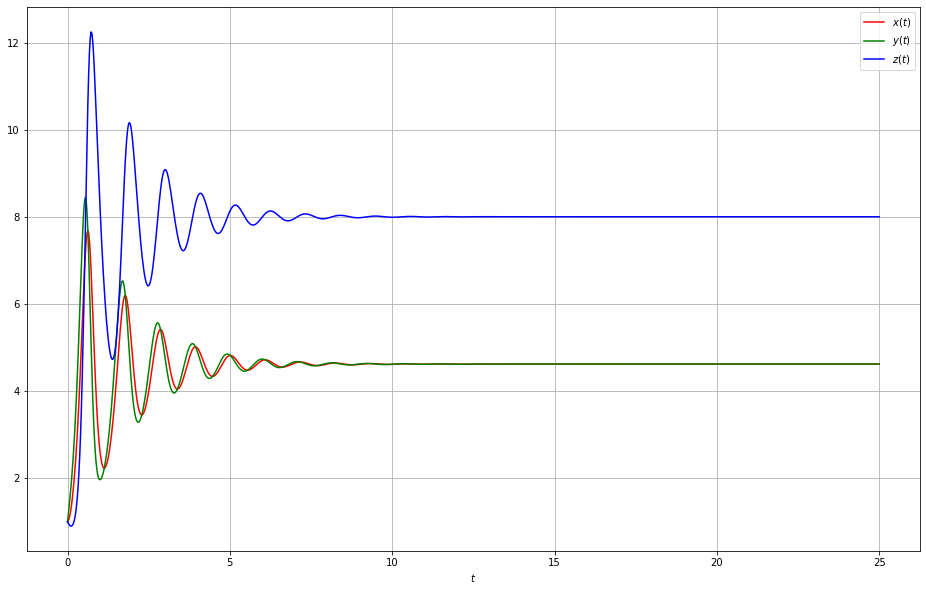

In [4]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16,10]

plt.plot(tList,sol[:,0],'r',label='$x(t)$')
plt.plot(tList,sol[:,1],'g',label='$y(t)$')
plt.plot(tList,sol[:,2],'b',label='$z(t)$')
plt.legend(loc='best')
plt.xlabel('$t$')
plt.grid()
plt.show()

That's much better! But let's go further. Also, it looks kinda boring. I promised the Lorenz equations were interesting and, so far, I haven't delivered on that promise.

Know how the Lorenz system is a system of 3 equations? That means we can plot a simulation in 3-dimensional space, and in fact our choice of variable names $x$, $y$, $z$ makes this seem like an even better idea.

## Step 4: Visualization, part 2 (plotting in phase space)

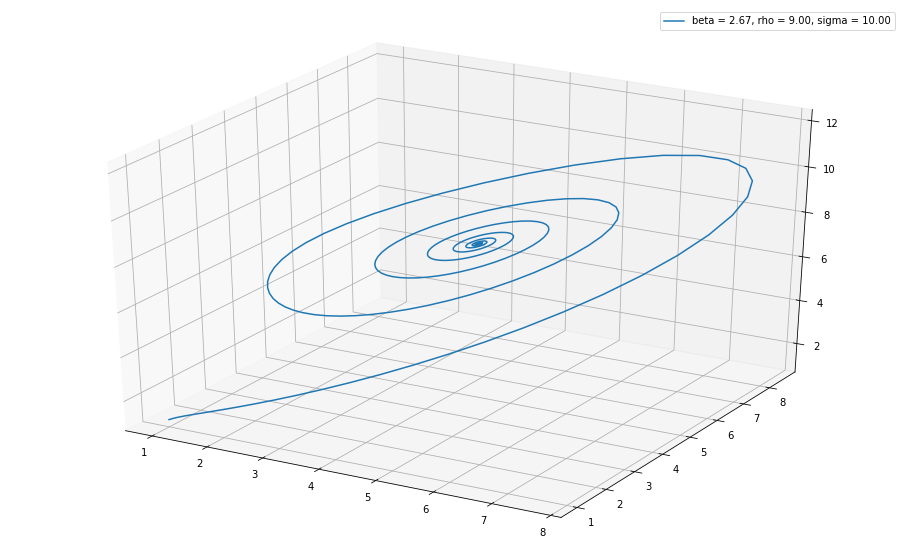

In [5]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax0 = fig.gca(projection='3d')
labelStr = ('beta = {:.2f}, rho = {:.2f}, sigma = {:.2f}'.format(beta,rho,sigma))
ax0.plot(sol[:,0],sol[:,1],sol[:,2],label=labelStr)
ax0.legend()
plt.show()

Now let's try the whole thing again, this time for different parameter values (same initial conditions):
* $(x(0),y(0),z(0)) = (1,1,1)$
* $(\beta, \rho, \sigma) = (8/3, 29, 10)$

In other words, everything remains the same except for $\rho$, which is now almost three times larger. Was the fluid flow laminar, and is it now turbulent?.

In [6]:
import numpy as np
from scipy.integrate import odeint

# Assign values to parameters of the Lorenz equations:
beta = [8/3,8/3]
rho = [9,29]
sigma = [10,10]

# Pick initial conditions and pack them into a list:
x0 = 1
y0 = 1
z0 = 1
state0 = [[x0,y0,z0],[x0,y0,z0]]

# Define a time window for simulation:
t0 = 0
tF = 25
Npts = 10001 # more points --> smoother curves in our plots
tList = np.linspace(t0,tF,Npts)

# Simulate:
sol = [[],[]]
sol[0] = odeint(lorenzRHS,state0[0],tList,args=(beta[0],rho[0],sigma[0]))
sol[1] = odeint(lorenzRHS,state0[1],tList,args=(beta[1],rho[1],sigma[1]))


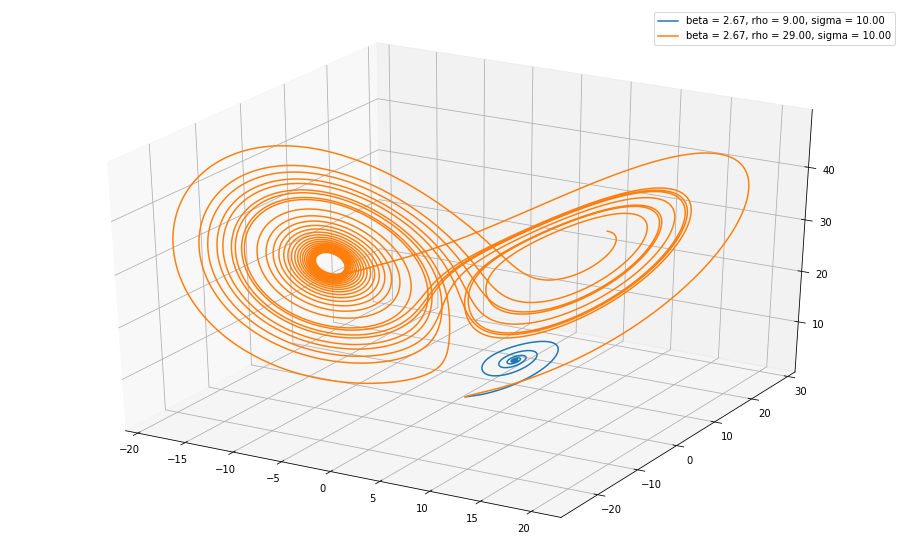

In [7]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

# Visualize:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax1 = fig.gca(projection='3d')
ax2 = fig.gca(projection='3d')
labelStr = [('beta = {:.2f}, rho = {:.2f}, sigma = {:.2f}'.format(beta[0],rho[0],sigma[0])),
            ('beta = {:.2f}, rho = {:.2f}, sigma = {:.2f}'.format(beta[1],rho[1],sigma[1]))]

ax1.plot(sol[0][:,0],sol[0][:,1],sol[0][:,2],label=labelStr[0])
ax1.legend()

ax2.plot(sol[1][:,0],sol[1][:,1],sol[1][:,2],label=labelStr[1])
ax2.legend()
plt.show()

## Step 5: Visualization, part 3 (animating trajectories in phase space)

Can we animate this? Can the animation actually look decent?

Yes! While `matplotlib` provides does support animations, the process is unnecessarily complicated for our purposes. I found a nice 3rd-party module called [`celluloid`](https://pypi.org/project/celluloid/) that is basically a wrapper for the `matplotlib` methods. It hides all the ugly stuff from the end user and offers a much cleaner approach to generating animations.

`celluloid` is a 3rd-party module, so you have to install it before you can use it. To install `celluloid`, run the cell below:

In [11]:
# import sys
!pip install celluloid

Now that `celluloid` is installed, let's repurpose the phase-space plotting code from above so that we can animate multiple trajectories simultaneously.

In [21]:
import random
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML

def animateSims(sol,params):
  # First, we have to set up a bunch of things:
  fig = plt.figure() # create a figure to be used for generating the animation
  camera = Camera(fig) # create an instance of celluloid's Camera object

  ax          = [] # empty list, will contain axes for plots
  linecolors  = [] # empty list, will append RGB tuples
  labelStr    = [] # empty list, will append strings
  for n in range(len(sol)):
    # generate a random RGB tuple:
    linecolors.append((random.random(),random.random(),random.random()))

    # create a new axes:
    ax.append(fig.gca(projection='3d'))

    # create a label (string) to later associate with the plot of this curve:
    beta  = params[0][n]
    rho   = params[1][n]
    sigma = params[2][n]
    labelStr.append('beta = {:.2f}, rho = {:.2f}, sigma = {:.2f}'.format(beta,rho,sigma))

    # Setting the axes properties:
    ax[n].set_xlim3d([-50.0, 50.0])
    ax[n].set_xlabel('$x$')
    ax[n].set_ylim3d([-50.0, 50.0])
    ax[n].set_ylabel('$y$')
    ax[n].set_zlim3d([0.0, 100.0])
    ax[n].set_zlabel('$z$')

  # Now for the actual animation part:
  for t in range(0,Npts,250):
    for n in range(len(sol)):
      ax[n].plot(sol[n][:t,0],sol[n][:t,1],sol[n][:t,2],color=linecolors[n],label=labelStr[n])
      # if t == 1:
      plt.legend(labelStr)
    camera.snap()
  anim = camera.animate()
  plt.close() # prevents the creation of an empty figure, but important to do this *after* calling camera.animate()
  return anim



In [25]:

# Code to use our animation function:
params = [beta,rho,sigma]
anim = animateSims(sol,params)
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

## Step 6: Coarse exploration of the parameter space, using Monte Carlo rollouts
Generate 10 random values for $0 \leq \rho \leq 50$ and animate solutions using `animateSims()`, with the same values as before for your initial conditions and other parameters:
* $(x(0),y(0),z(0)) = (1,1,1)$
* $\beta = \frac{8}{3}$,
* $\sigma = 10$

In [ ]:
import random

params = [[],[],[]]
beta = 8/3
sigma = 10

x0 = 1
y0 = 1
z0 = 1
state0 = [x0,y0,z0]

# Define a time window for simulation:
t0 = 0
tF = 25
Npts = 10001 # more points --> smoother curves in our plots
tList = np.linspace(t0,tF,Npts)

# Simulate:
sol = []
for i in range(5):
  rho = random.uniform(20,40)
  params[0].append(beta)
  params[1].append(rho)
  params[2].append(sigma)

  soln = odeint(lorenzRHS,state0,tList,args=(beta,rho,sigma))

  sol.append(soln)




In [ ]:
anim = animateSims(sol,params)
HTML(anim.to_html5_video())